<a href="https://colab.research.google.com/github/chu-ise/413A-2022/blob/main/notebooks/05/01_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K–Nearest Neighbors (k-NN) 



In [2]:
import scipy as sc
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import matplotlib.colors 

%matplotlib inline  
%config InlineBackend.figure_format='retina'

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split

### Example: Classifying Two Moons

Let's consider a synthetic dataset in the shape of "two moons". Here, each sample has two pieces of information: 
* the *features*, denoted by $x_i$, which are just a two-dimensional coordinate and 
* a *class*, denoted by $y_i$, which is either 0 and 1. 

(500, 2) (500,)
[[ 0.50316464  0.11135559]
 [ 1.06597837 -0.63035547]
 [ 0.95663377  0.58199637]
 [ 0.33961202  0.40713937]
 [ 2.17952333 -0.08488181]
 [ 2.00520942  0.7817976 ]
 [ 0.12531776 -0.14925731]
 [ 1.06990641  0.36447753]
 [-0.76391099 -0.6136396 ]
 [ 0.55678871  0.8810501 ]]
[1 1 0 0 1 1 1 0 0 0]


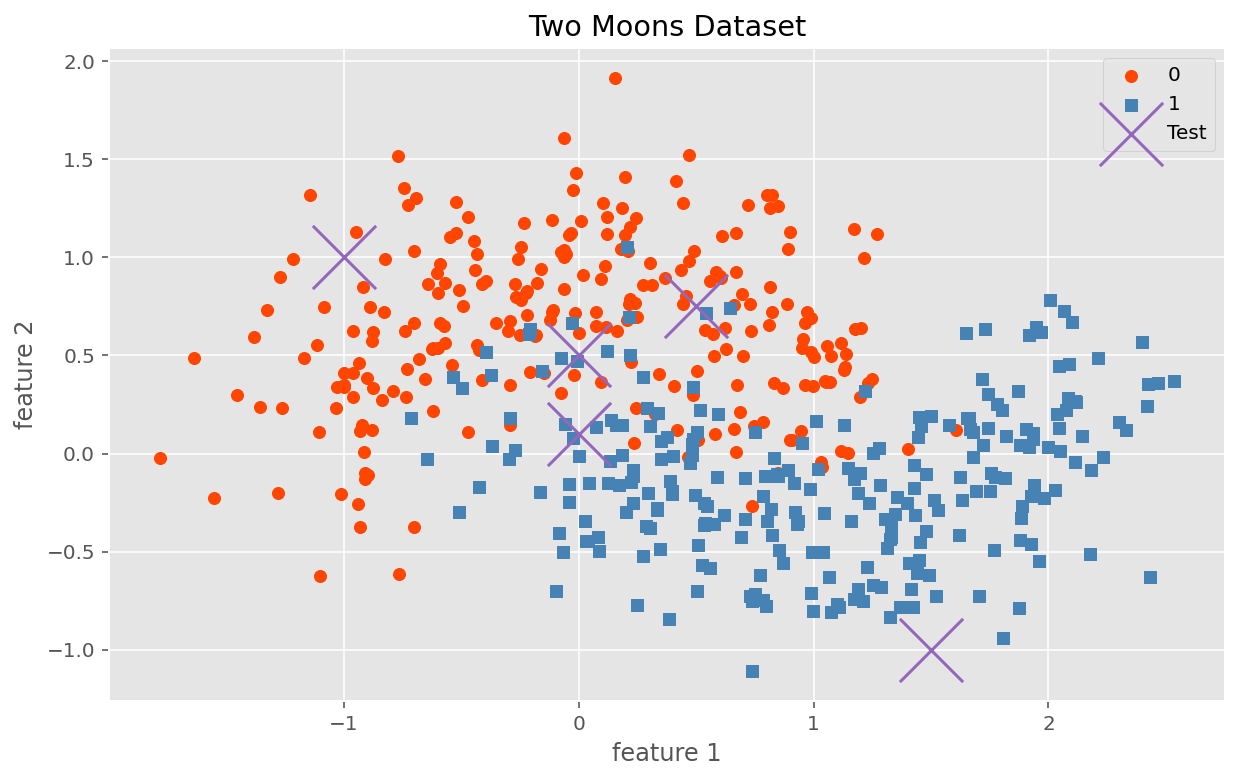

In [3]:
# there are two features contained in X and the labels are contained in y
X,y = make_moons(n_samples=500,random_state=1,noise=0.3)

# X is a 500x2 numpy.ndarray containing the coordinates for each sample
# y is a 500x1 numpy.ndarray containing the class for each sample
print(np.shape(X), np.shape(y))
print(X[:10])
print(y[:10])

# Plot the data, color by class
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="OrangeRed", marker="o",label="0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="SteelBlue", marker="s",label="1")

test1 = [1.5,-1] # should be 1
test2 = [-1,1] # should be 0
test3 = [0,0.1] # borderline, probably 1
test4 = [0,0.5] # borderline, probably 0 
test5 = [0.5,0.75] # borderline, probably 0 
test = [test1, test2, test3, test4, test5]

plt.scatter([x[0] for x in test], [y[1] for y in test], color="tab:Purple", marker="x",label="Test", s=1000)
    

plt.legend(scatterpoints=1)

plt.title('Two Moons Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()


Here, we will use the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).


In [4]:
# Here we initialize the model. The key parameter is the number of neighbors (k) to consider. 
model = KNeighborsClassifier(n_neighbors = 100)
# Here we train the model with the data (X) and the labels (y)
model.fit(X, y)

# We can then use new, never beofre seen data to make predictions
print(test1, "expected 1, predicted:", model.predict([test1]))
print(test2, "expected 0, predicted:", model.predict([test2]))
print(test3, "borderline 1, predicted:", model.predict([test3]))
print(test4, "borderline 0, predicted:", model.predict([test4]))
print(test5, "borderline 0, predicted:", model.predict([test5]))

[1.5, -1] expected 1, predicted: [1]
[-1, 1] expected 0, predicted: [0]
[0, 0.1] borderline 1, predicted: [1]
[0, 0.5] borderline 0, predicted: [0]
[0.5, 0.75] borderline 0, predicted: [0]


Try out the above code with different levels of k, in particular very low k-values of 1 or 2.

In [5]:
# Here we initialize the model. The key parameter is the number of neighbors (k) to consider. 
model = KNeighborsClassifier(n_neighbors = 1)
# Here we train the model with the data (X) and the labels (y)
model.fit(X, y)

# We can then use new, never beofre seen data to make predictions
print(test1, "expected 1, predicted:", model.predict([test1]))
print(test2, "expected 0, predicted:", model.predict([test2]))
print(test3, "borderline 1, predicted:", model.predict([test3]))
print(test4, "borderline 0, predicted:", model.predict([test4]))
print(test5, "borderline 0, predicted:", model.predict([test5]))

[1.5, -1] expected 1, predicted: [1]
[-1, 1] expected 0, predicted: [0]
[0, 0.1] borderline 1, predicted: [1]
[0, 0.5] borderline 0, predicted: [1]
[0.5, 0.75] borderline 0, predicted: [1]


We can also plot **decision boundaries** for classifiers, which is a very intuitive method in 2D to understand what's going on: 

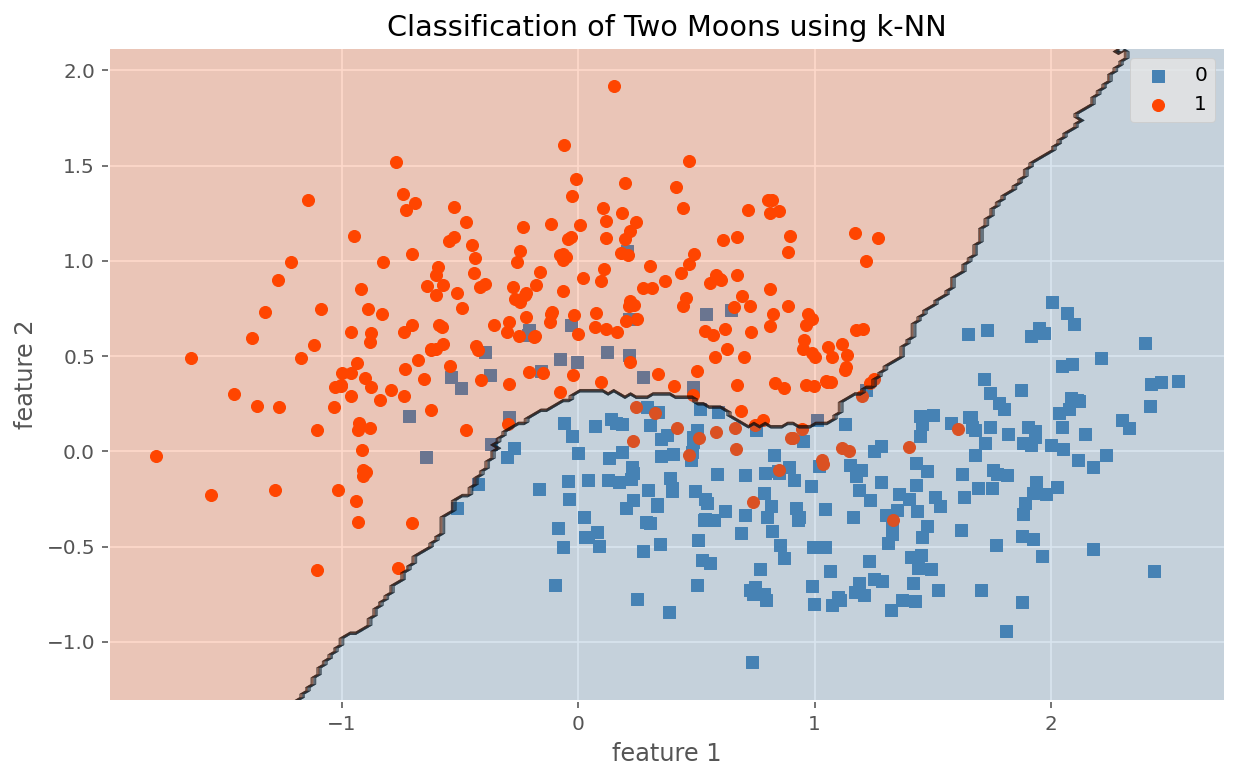

In [6]:
model = KNeighborsClassifier(n_neighbors = 100)
model.fit(X, y)

# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="SteelBlue", marker="s",label="0")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="OrangeRed", marker="o",label="1")
plt.legend(scatterpoints=1)


# Computing and plotting the decision boundaries
padding = 0.2
x_min, x_max = X[:,0].min() - padding, X[:, 0].max() + padding
y_min, y_max = X[:,1].min() - padding, X[:, 1].max() + padding
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=matplotlib.colors.ListedColormap(['OrangeRed', 'SteelBlue']), alpha=.2)
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Classification of Two Moons using k-NN')

plt.show()

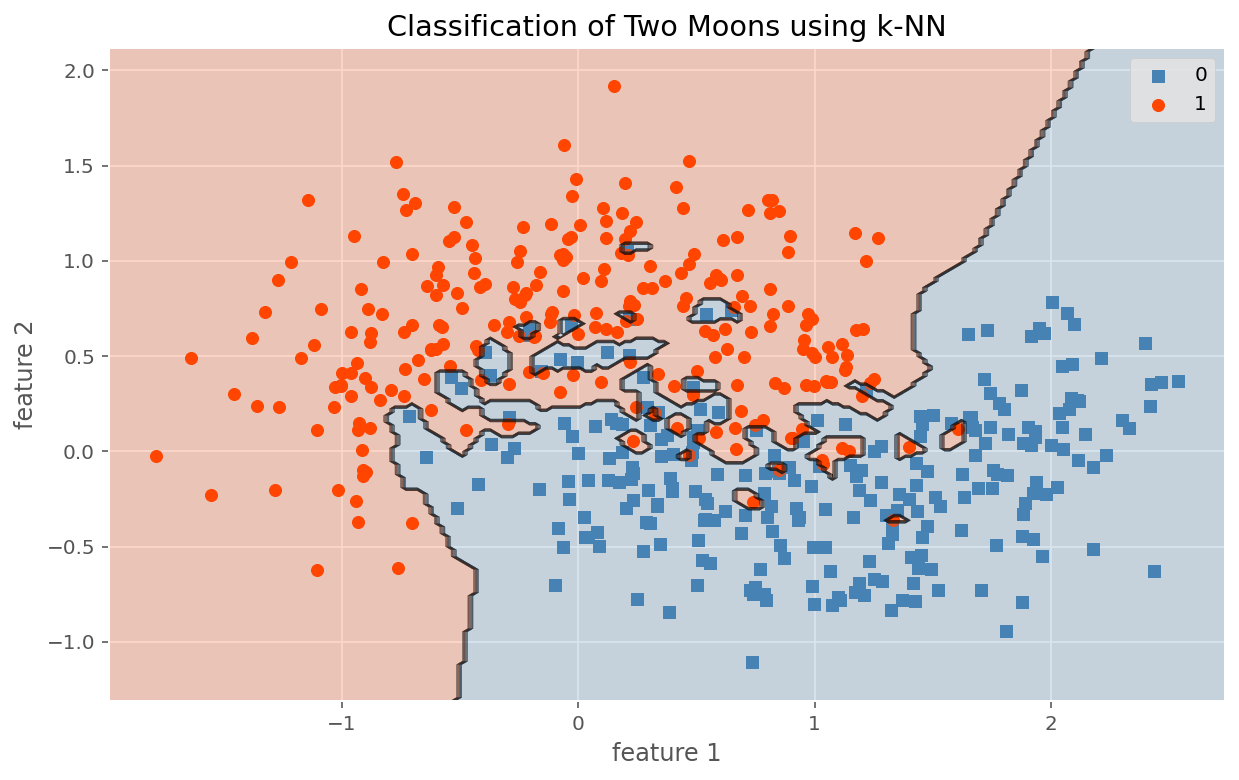

In [7]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X, y)

# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="SteelBlue", marker="s",label="0")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="OrangeRed", marker="o",label="1")
plt.legend(scatterpoints=1)


# Computing and plotting the decision boundaries
padding = 0.2
x_min, x_max = X[:,0].min() - padding, X[:, 0].max() + padding
y_min, y_max = X[:,1].min() - padding, X[:, 1].max() + padding
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=matplotlib.colors.ListedColormap(['OrangeRed', 'SteelBlue']), alpha=.2)
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Classification of Two Moons using k-NN')

plt.show()

### Evaluating a classification method



In [8]:
y_pred = model.predict(X)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y, y_pred = y_pred))

print('Precision = ', metrics.precision_score(y_true = y, y_pred = y_pred))
print('Recall = ', metrics.recall_score(y_true = y, y_pred = y_pred))
print('F-score = ', metrics.f1_score(y_true = y, y_pred = y_pred))

print('Jaccard similarity score', metrics.jaccard_score(y_true = y, y_pred = y_pred))

Confusion Matrix:
[[250   0]
 [  0 250]]
Precision =  1.0
Recall =  1.0
F-score =  1.0
Jaccard similarity score 1.0


### Dataset: The Iris dataset

Let's try kNN on a real dataset. We'll use the super-common Iris dataset for a demonstration. This dataset was introduced in 1936 by the statistician [Sir Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher). 

The dataset contains 4 features (attributes) of 50 samples containing 3 different species of [iris plants](https://en.wikipedia.org/wiki/Iris_(plant)). The goal is to classify the species of iris plant given the attributes. 

**The species, or classes are:**
1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica

**The features (attributes) we have are::**
1. sepal length (cm) 
2. sepal width (cm) 
3. petal length (cm) 
4. petal width (cm) 

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


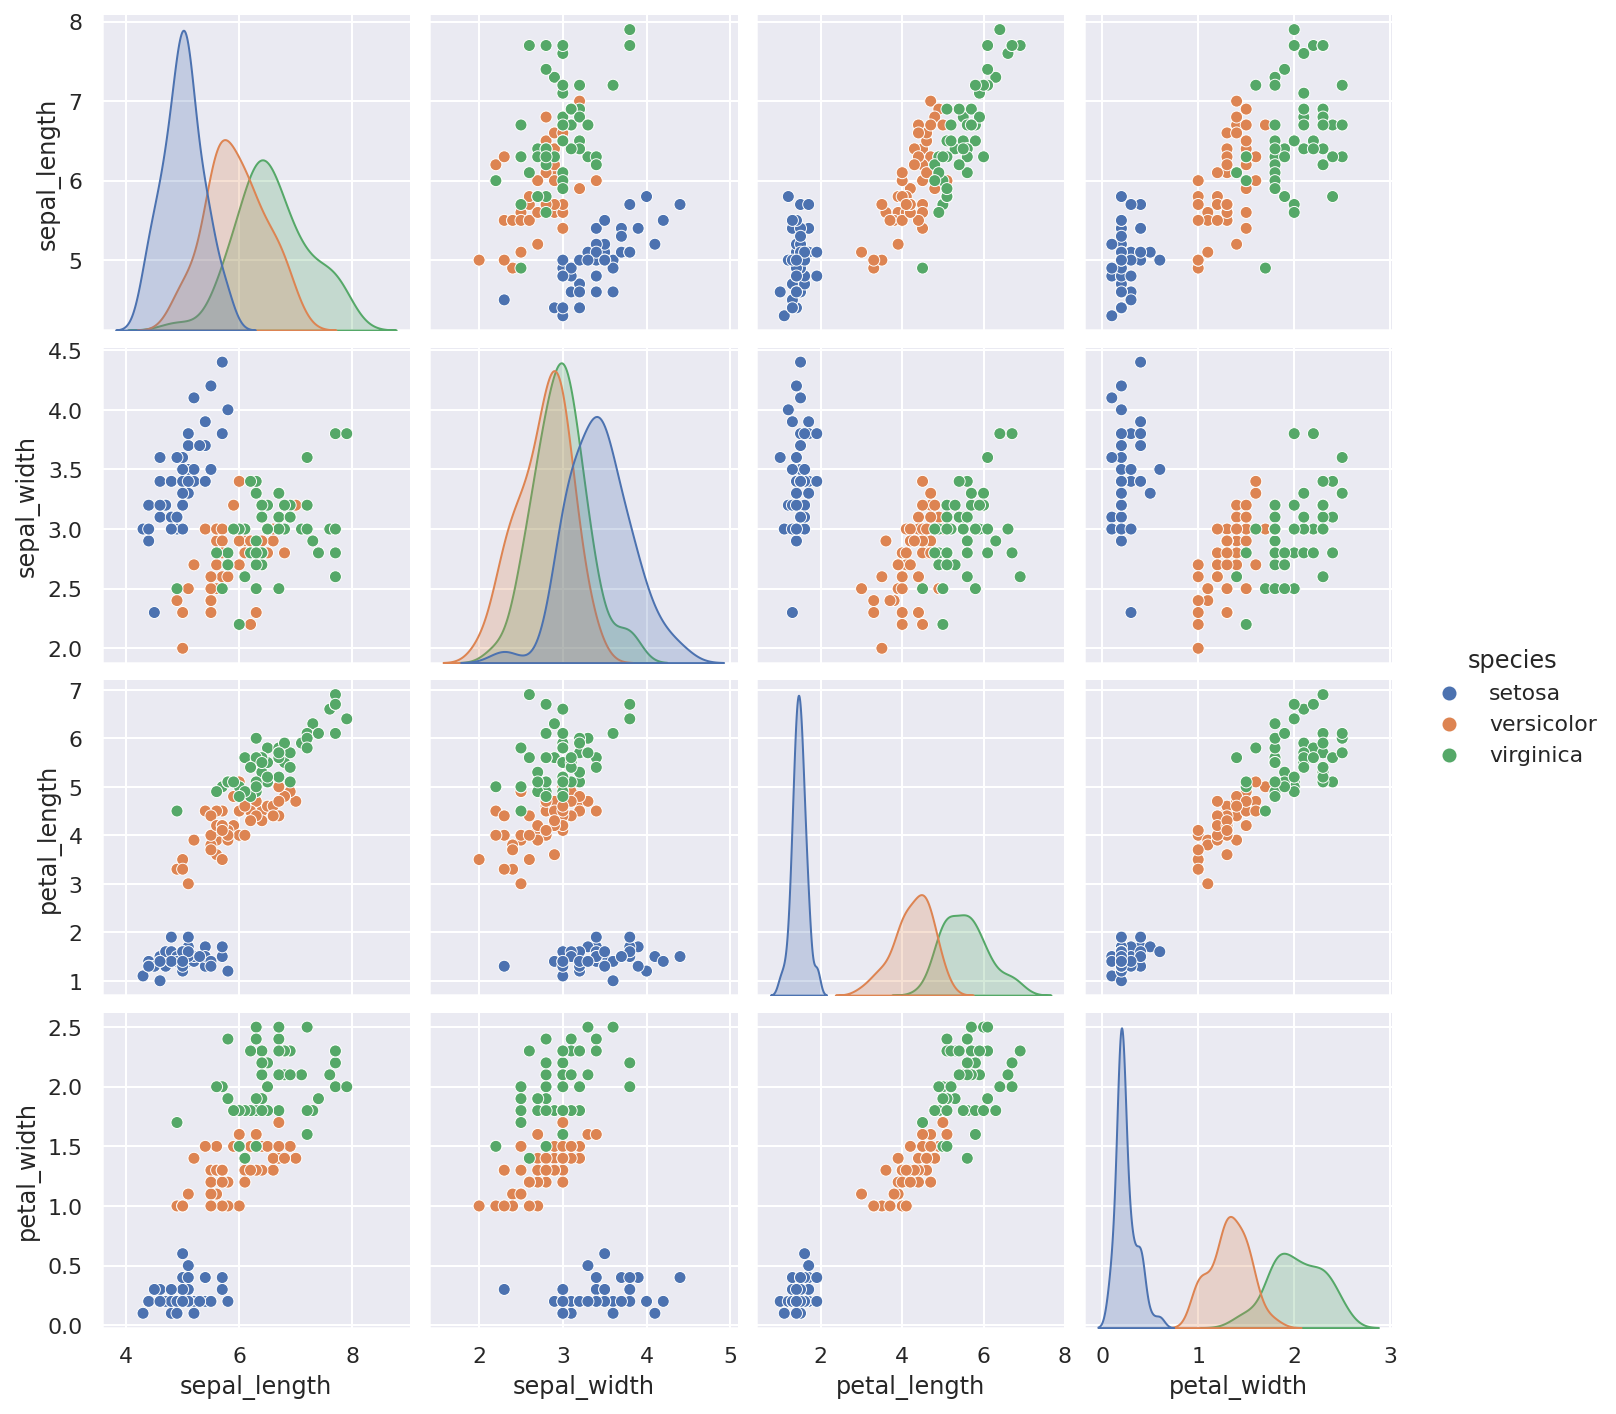

In [9]:
import seaborn as sns
sns.set()

df = sns.load_dataset("iris") # built-in dataset in seaborn 
print(df.describe())
sns.pairplot(df, hue="species");

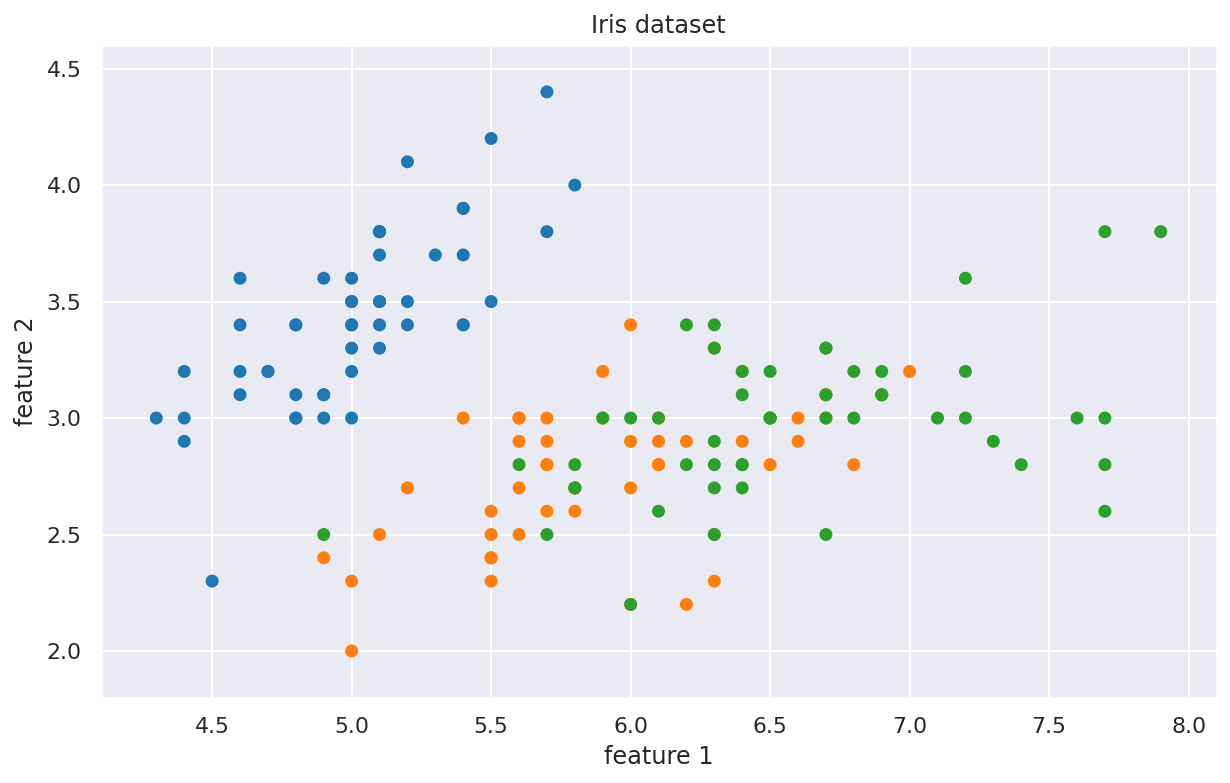

In [10]:
# import data, scikit-learn also has this dataset built-in
iris = load_iris()

# For easy plotting and interpretation, we only use first 2 features here. 
# We're throwing away useful information - don't do this at home! 
X = iris.data[:,:2]  
y = iris.target

# Create color maps
clrs = sns.color_palette("tab10").as_hex();
cmap_bold = matplotlib.colors.ListedColormap(clrs[:3])

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y,  marker="o", cmap=cmap_bold, s=30)

x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)    
plt.title('Iris dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

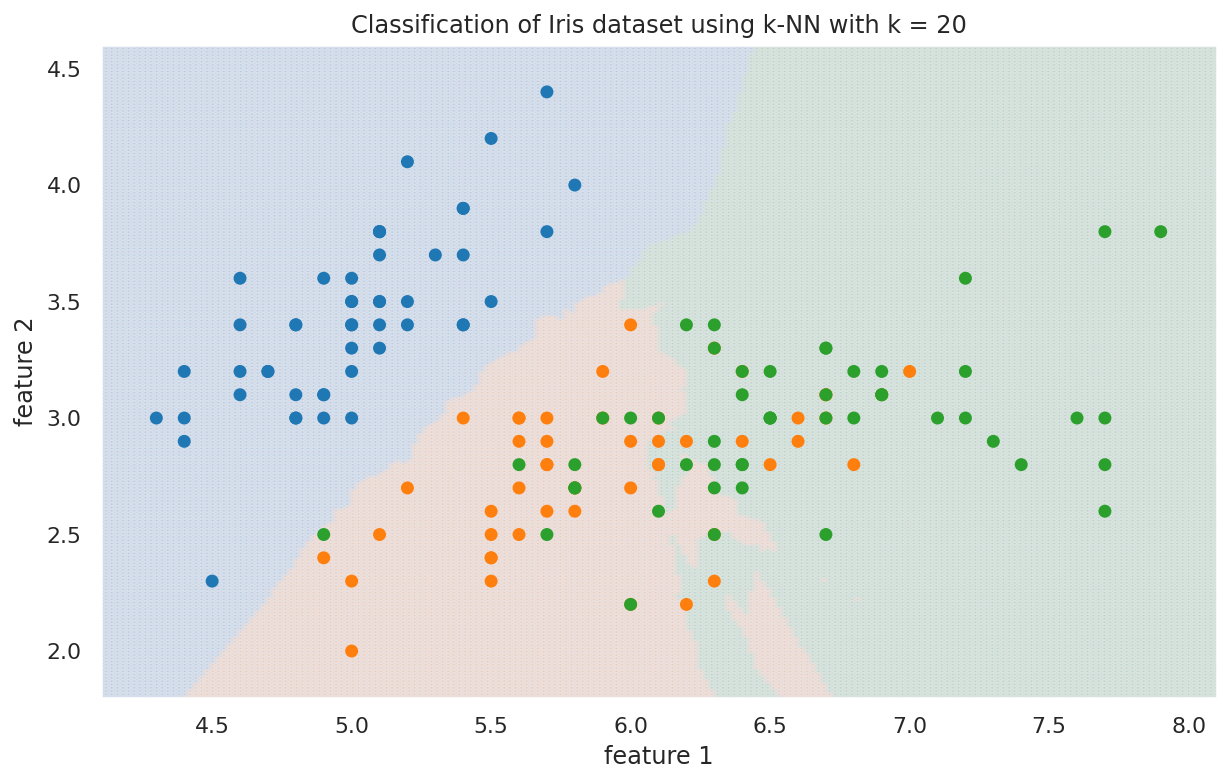

In [11]:
## set up the model, k-NN classification with k = ?  
k = 20
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)

# plot classification 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap_bold, alpha=0.05, shading='gouraud')

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=30)

plt.title('Classification of Iris dataset using k-NN with k = '+ str(k))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)    
plt.show()

In [12]:
print('Confusion Matrix:')
y_pred = clf.predict(X)
print(metrics.accuracy_score(y_true=y, y_pred=y_pred))
print(metrics.confusion_matrix(y_true = y, y_pred = y_pred))

Confusion Matrix:
0.7866666666666666
[[50  0  0]
 [ 0 31 19]
 [ 0 13 37]]


Now, we've only done this with two dimensions, what happens if we do it with all of the dimensions?

In [13]:
k = 20
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(iris.data, y)

y_pred = clf.predict(iris.data)
print(metrics.accuracy_score(y_true=y, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y, y_pred=y_pred))

0.98
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


## Model generalizability and cross-validation

In [14]:
# Split into training and test sets
X,y = make_moons(n_samples=1000,random_state=1,noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.7)

for k in [1, 2, 5, 10, 50, 100]:
    print("k is:", k)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("Accuracy Train:", metrics.accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
    print("Accuracy Test:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
    print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
    print()


k is: 1
Accuracy Train: 1.0
Accuracy Test: 0.7028571428571428
[[254 109]
 [ 99 238]]

k is: 2
Accuracy Train: 0.8433333333333334
Accuracy Test: 0.7071428571428572
[[310  53]
 [152 185]]

k is: 5
Accuracy Train: 0.84
Accuracy Test: 0.7685714285714286
[[275  88]
 [ 74 263]]

k is: 10
Accuracy Train: 0.8133333333333334
Accuracy Test: 0.7928571428571428
[[299  64]
 [ 81 256]]

k is: 50
Accuracy Train: 0.7866666666666666
Accuracy Test: 0.7971428571428572
[[278  85]
 [ 57 280]]

k is: 100
Accuracy Train: 0.77
Accuracy Test: 0.7842857142857143
[[270  93]
 [ 58 279]]




As the model becomes more complex (k decreases), the accuracy always increases for the training dataset. But, at some point, it starts to overfit the data and the accuracy decreases for the test dataset! Cross validation techniques will allow us to find the sweet-spot for the parameter k! (Think: Goldilocks and the Three Bears.)


Let's look at the decision boundaries for the two moons dataset. You can use the *train_test_split* function in scikit-learn to split the dataset into a training dataset and a test dataset. 

In [15]:
def detect_plot_dimension(X, h=0.02, b=0.05):
    x_min, x_max = X[:, 0].min() - b, X[:, 0].max() + b
    y_min, y_max = X[:, 1].min() - b, X[:, 1].max() + b
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    dimension = xx, yy
    return dimension
 
def detect_decision_boundary(dimension, model):
    xx, yy = dimension  # unpack the dimensions
    boundary = model.predict(np.c_[xx.ravel(), yy.ravel()])
    boundary = boundary.reshape(xx.shape)  # Put the result into a color plot
    return boundary
 
def plot_decision_boundary(panel, dimension, boundary, colors=['#DADDED', '#FBD8D8']):
    xx, yy = dimension  # unpack the dimensions
    panel.contourf(xx, yy, boundary, cmap=matplotlib.colors.ListedColormap(colors), alpha=1)
    panel.contour(xx, yy, boundary, colors="g", alpha=1, linewidths=0.5)  # the decision boundary in green
 
def plot_dataset(panel, X, y, colors=["#EE3D34", "#4458A7"], markers=["x", "o"]):
    panel.scatter(X[y == 1, 0], X[y == 1, 1], color=colors[0], marker=markers[0])
    panel.scatter(X[y == 0, 0], X[y == 0, 1], color=colors[1], marker=markers[1])
 
def calculate_prediction_error(model, X, y):
    yPred = model.predict(X)
    score = round(metrics.accuracy_score(y, yPred), 2)
    return score
 
def plot_prediction_error(panel, dimension, score, b=.3):
    xx, yy = dimension  # unpack the dimensions
    panel.text(xx.max() - b, yy.min() + b, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
 
def explore_fitting_boundaries(model, n_neighbors, datasets, width):  
    # determine the height of the plot given the aspect ration of each panel should be equal
    height = float(width)/len(n_neighbors) * len(datasets.keys())
 
    nrows = len(datasets.keys())
    ncols = len(n_neighbors)
 
    # set up the plot
    figure, axes = plt.subplots(
        nrows,
        ncols,
        figsize=(width, height),
        sharex=True,
        sharey=True
    )
 
    dimension = detect_plot_dimension(X, h=0.02)  # the dimension each subplot based on the data
 
    # Plotting the dataset and decision boundaries
    i = 0
    for n in n_neighbors:
        model.n_neighbors = n
        model.fit(datasets["Training Set"][0], datasets["Training Set"][1])
        boundary = detect_decision_boundary(dimension, model)
        j = 0
        for d in datasets.keys():
            try:
                panel = axes[j, i]
            except (TypeError, IndexError):
                if (nrows * ncols) == 1:
                    panel = axes
                elif nrows == 1:  # if you only have one dataset
                    panel = axes[i]
                elif ncols == 1:  # if you only try one number of neighbors
                    panel = axes[j]
            plot_decision_boundary(panel, dimension, boundary)  # plot the decision boundary
            plot_dataset(panel, X=datasets[d][0], y=datasets[d][1])  # plot the observations
            score = calculate_prediction_error(model, X=datasets[d][0], y=datasets[d][1])
            plot_prediction_error(panel, dimension, score, b=0.2)  # plot the score
 
            # make compacted layout
            panel.set_frame_on(False)
            panel.set_xticks([])
            panel.set_yticks([])
 
            # format the axis labels
            if i == 0:
                panel.set_ylabel(d)
            if j == 0:
                panel.set_title('k={}'.format(n))
            j += 1
        i += 1   
 
    plt.subplots_adjust(hspace=0, wspace=0)  # make compacted layout

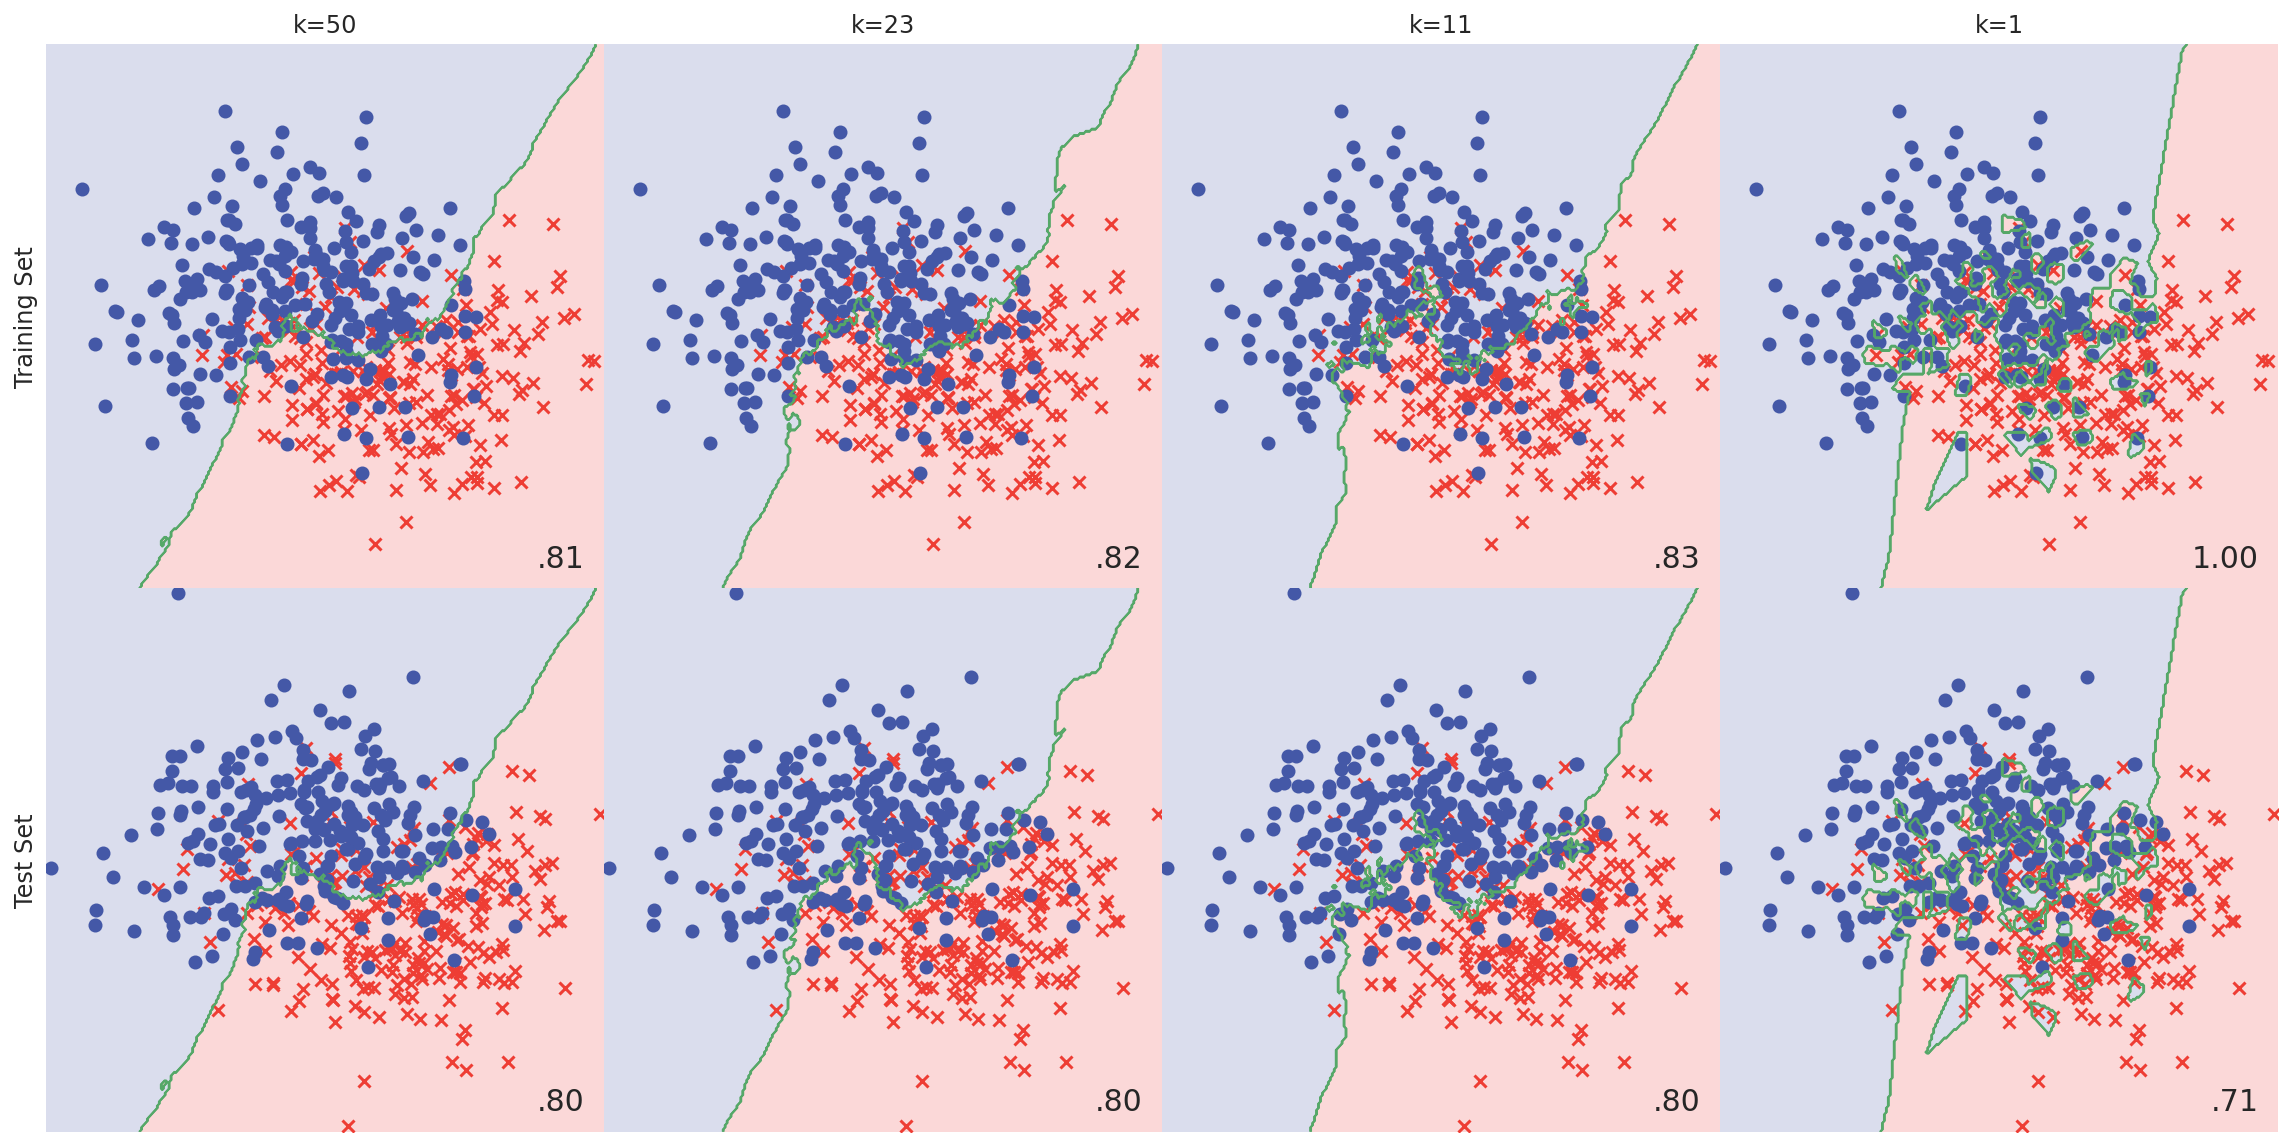

In [16]:
# Split into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)

# specify the model and settings
model = KNeighborsClassifier()
n_neighbors = [50, 23, 11, 1]
datasets = {
    "Training Set": [XTrain, yTrain],
    "Test Set": [XTest, yTest]
}
width = 20

explore_fitting_boundaries(model=model, n_neighbors=n_neighbors, datasets=datasets, width=width)
